In [1]:
import cv2 #OpenCV for computer vision tasks
import os #'os' for interacting with the operating system
import numpy as np #'numpy' for numerical operations
from sklearn.model_selection import train_test_split #'train_test_split' from scikit-learn for splitting datasets
import warnings #'warnings' to filter out warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #'matplotlib' for plotting
import seaborn as sns #'seaborn' for statistical data visualization
import pandas as pd #'pandas' for data manipulation and analysis
import tensorflow as tf #'tensorflow' for deep learning
from tensorflow.keras.applications import VGG16 #'VGG16' from Keras applications for using the VGG16 pre-trained model
from tensorflow.keras import layers, models #'layers' and 'models' from Keras for building neural network models
from sklearn.model_selection import ParameterGrid #'ParameterGrid' from scikit-learn for grid search of hyperparameters
import random #'random' for generating random numbers
from sklearn.metrics import classification_report, confusion_matrix #'classification_report' and 'confusion_matrix' from scikit-learn for model evaluation
from tensorflow.keras.preprocessing import image # 'image' from Keras for image preprocessing
import tensorflow as tf

In [2]:
# Path to the directory containing the dataset
dataset_path = r'C:\Users\Acer\Desktop\21039936 SAROJ GIR\dogs_vs_cat\img'

In [3]:
# Get a list of all image files in the directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.jpeg', '.png'))] #list comprehension  

# Lists to store images and corresponding labels
images = []
labels = []

# Define the desired size for all images 
desired_size = (100, 100)

In [4]:
# Iterate through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(dataset_path, image_file)

    # Read the image using cv2
    image = cv2.imread(image_path)

    # Resize the image to the desired size
    image = cv2.resize(image, desired_size)

    # Extract label from the filename 
    label = 'cat' if image_file.startswith('cat') else 'dog'

    # Append the resized image and label to the lists
    images.append(image)
    labels.append(label)

In [5]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [6]:
# Function to display a random image for a given label
def display_random_image(X, y, label):
    # Get indices of images with the specified label
    indices = np.where(y == label)[0]
    
    # Choose a random index
    random_index = np.random.choice(indices)
    
    # Display the image
    plt.imshow(X[random_index])
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

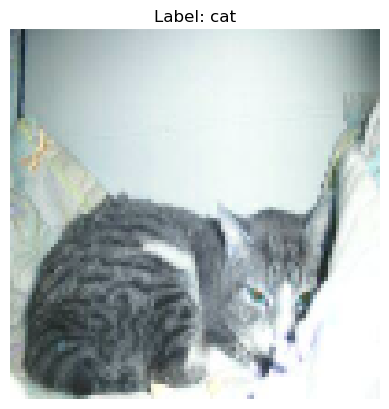

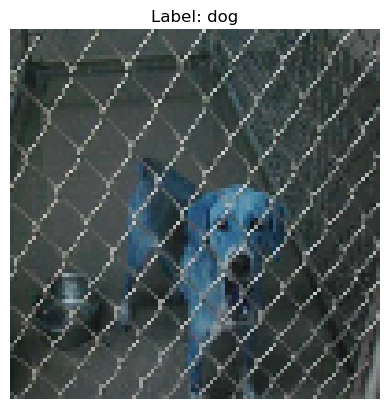

In [7]:
# Display a random cat image
display_random_image(X_train, y_train, 'cat')

# Display a random dog image
display_random_image(X_train, y_train, 'dog')

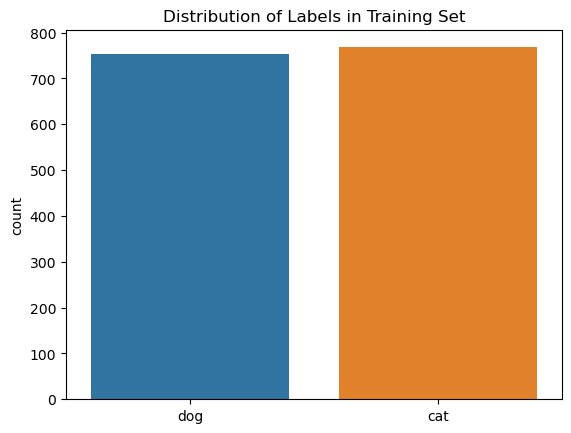

In [8]:
# Plot the distribution of labels
sns.countplot(x=y_train)
plt.title('Distribution of Labels in Training Set')
plt.show()

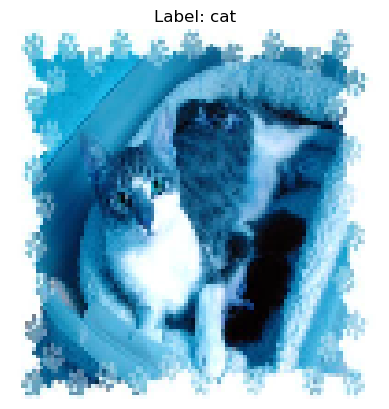

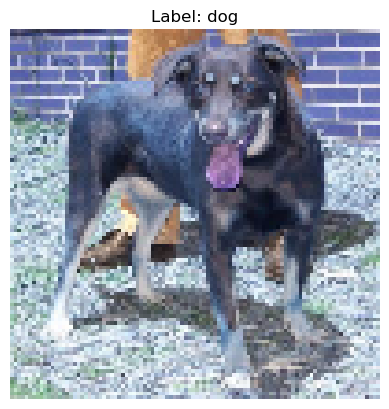

In [9]:
# Display random cat images
for _ in range(1):
    display_random_image(X_train, y_train, 'cat')

# Display random dog images
for _ in range(1):
    display_random_image(X_train, y_train, 'dog')

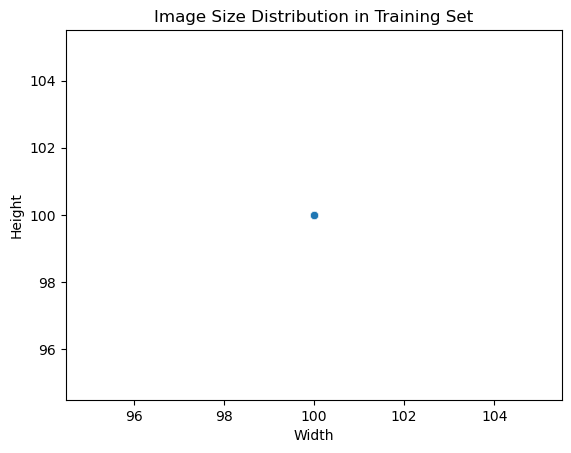

In [10]:
# Plot the distribution of image sizes
image_sizes = np.array([image.shape[:2] for image in X_train])
sns.scatterplot(x=image_sizes[:, 0], y=image_sizes[:, 1])
plt.title('Image Size Distribution in Training Set')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

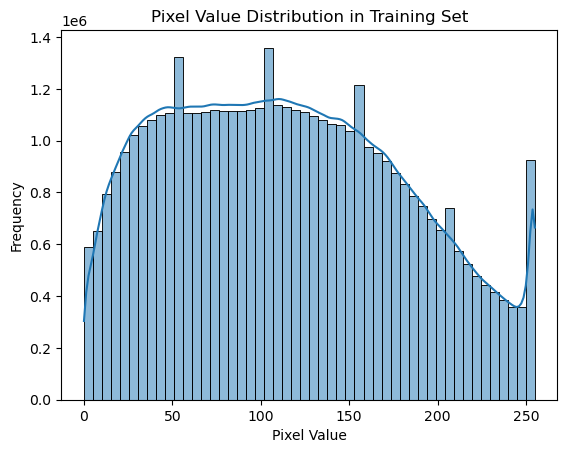

In [11]:
# Flatten images and plot pixel value distribution
pixel_values = X_train.flatten()
sns.histplot(pixel_values, bins=50, kde=True)
plt.title('Pixel Value Distribution in Training Set')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

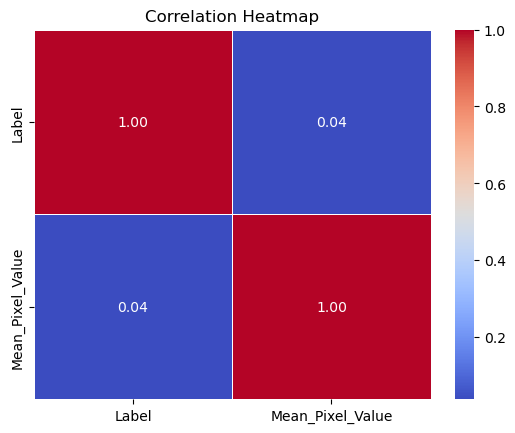

In [12]:
# Calculate mean pixel values for each image
mean_pixel_values = np.mean(X_train, axis=(1, 2, 3))

# Create a DataFrame for correlation analysis
corr_df = pd.DataFrame({'Label': y_train, 'Mean_Pixel_Value': mean_pixel_values})

# Map labels to numerical values (cat: 0, dog: 1)
corr_df['Label'] = corr_df['Label'].map({'cat': 0, 'dog': 1})

# Create a correlation matrix
corr_matrix = corr_df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# function to create and train the VGG-16 model with given hyperparameters
def train_vgg16(learning_rate, epochs):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu')) 
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid')) # logistic function activation function used in neural network

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, (y_train == 'dog').astype(int), epochs=epochs, batch_size=32, validation_split=0.2, verbose=1)
    
    return model, history.history['val_accuracy'][-1]

In [14]:
# hyperparameter grid for learning rates
param_grid = {
    'learning_rate': [0.001, 0.0001, 0.00001],
}

# Perform hyperparameter tuning
best_accuracy = 0
best_params = None
results = []

In [15]:
# Train for exactly 10 epochs and display accuracy after each epoch
for params in ParameterGrid(param_grid):
    print(f"\nHyperparameters: Learning Rate - {params['learning_rate']}")
    model, accuracy = train_vgg16(params['learning_rate'], epochs=10) # number of iteration
    results.append((params, accuracy))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params


Hyperparameters: Learning Rate - 0.001


Epoch 1/10


39/39 [==============================] - 464s 12s/step - loss: 15.6706 - accuracy: 0.4889 - val_loss: 12.0486 - val_accuracy: 0.5279
Epoch 2/10
39/39 [==============================] - 445s 11s/step - loss: 1.0247 - accuracy: 0.5226 - val_loss: 0.6902 - val_accuracy: 0.5213
Epoch 3/10
39/39 [==============================] - 451s 12s/step - loss: 0.7039 - accuracy: 0.5234 - val_loss: 0.7049 - val_accuracy: 0.4721
Epoch 4/10
39/39 [==============================] - 450s 12s/step - loss: 0.7104 - accuracy: 0.5374 - val_loss: 0.7583 - val_accuracy: 0.4689
Epoch 5/10
39/39 [==============================] - 443s 11s/step - loss: 0.7158 - accuracy: 0.5333 - val_loss: 0.6926 - val_accuracy: 0.5279
Epoch 6/10
39/39 [==============================] - 439s 11s/step - loss: 0.6931 - accuracy: 0.5078 - val_loss: 0.6930 - val_accuracy: 0.5377
Epoch 7/10
39/39 [==============================] - 477s 12s/step - loss: 0.6932 - accuracy: 0.5119 - 

In [16]:
# Display results
for params, accuracy in results:
    print(f'Learning Rate: {params["learning_rate"]}, Validation Accuracy: {accuracy * 100:.2f}%')

print(f'\nBest Hyperparameters:')
print(f'Learning Rate: {best_params["learning_rate"]}')
print(f'Best Validation Accuracy: {best_accuracy * 100:.2f}%')

Learning Rate: 0.001, Validation Accuracy: 54.10%
Learning Rate: 0.0001, Validation Accuracy: 78.69%
Learning Rate: 1e-05, Validation Accuracy: 87.87%

Best Hyperparameters:
Learning Rate: 1e-05
Best Validation Accuracy: 87.87%


In [17]:
from sklearn.metrics import classification_report

# After training, the trained model is used to make predictions on the test set
y_pred = model.predict(X_test)

# Assuming y_test contains the true labels for your test set
# If y_test is in string format ('dog' or 'non-dog'), convert it to binary labels
y_true = (y_test == 'dog').astype(int)

# Generate the classification report
classification_rep = classification_report(y_true, (y_pred > 0.5).astype(int))

# Print the classification report
print("Classification Report:\n", classification_rep)

12/12 [==============================] - 22s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       190
           1       0.88      0.88      0.88       191

    accuracy                           0.88       381
   macro avg       0.88      0.88      0.88       381
weighted avg       0.88      0.88      0.88       381



In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# After training, use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Assuming y_test contains the true labels for your test set
# If y_test is in string format ('dog' or 'cat'), convert it to binary labels
y_true = (y_test == 'dog').astype(int)

# Convert probabilities to binary predictions (0 or 1) using a threshold (0.5 in this case)
y_pred_binary = (y_pred > 0.5).astype(int)

12/12 [==============================] - 21s 2s/step


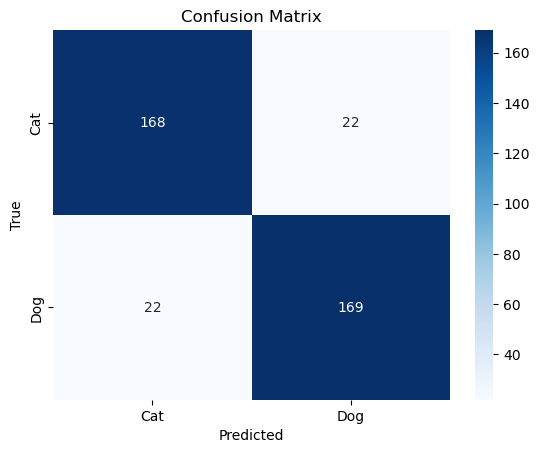

In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 177ms/step


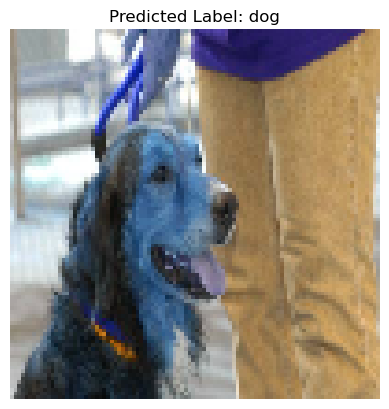

In [26]:
# Select a random index from the training set
random_index = random.randint(0, len(X_train) - 1)

# Load and preprocess the random image
random_image = X_train[random_index]
random_image = np.expand_dims(random_image, axis=0) 
# Make a prediction using the trained model
prediction = model.predict(random_image)

# Convert the prediction to 'cat' or 'dog'
predicted_label = 'dog' if prediction[0][0] > 0.5 else 'cat'

# Display the random image and the predicted label
plt.imshow(X_train[random_index])
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 188ms/step


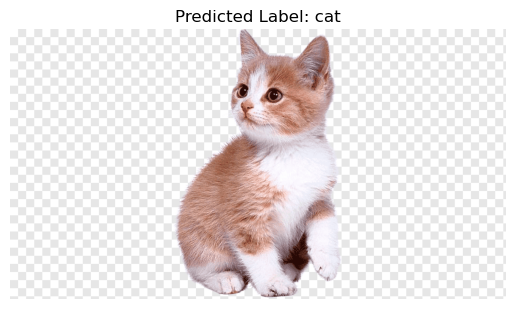

In [30]:
# Path to the unseenimage 
image_path = r'C:\Users\Acer\Desktop\Unseen\test1.png'  

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))  #  the input size for the model is (100, 100)
img = np.expand_dims(img, axis=0) 
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# prediction using the trained model
prediction = model.predict(img)

# Convert the prediction to 'cat' or 'dog'
predicted_label = 'dog' if prediction[0][0] > 0.5 else 'cat'

# Display the image and the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 179ms/step


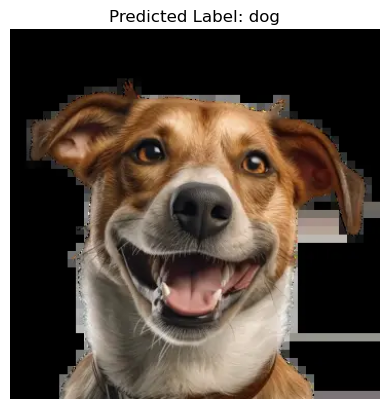

In [32]:
# Path to the unseenimage 
image_path = r'C:\Users\Acer\Desktop\Unseen\test2.png'  

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))  # The input size for the model is (100, 100)
img = np.expand_dims(img, axis=0) 
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# prediction using the trained model
prediction = model.predict(img)

# Convert the prediction to 'cat' or 'dog'
predicted_label = 'dog' if prediction[0][0] < 0.5 else 'cat'

# Display the image and the predicted label
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()